In [2]:
import nmrglue as ng
import matplotlib.pyplot as plt
import numpy as np

In [3]:
di, data = ng.bruker.read('./testdata/190109-1405-29-bdzeng-ult400/10')

/home/gnezd/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/gnezd/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


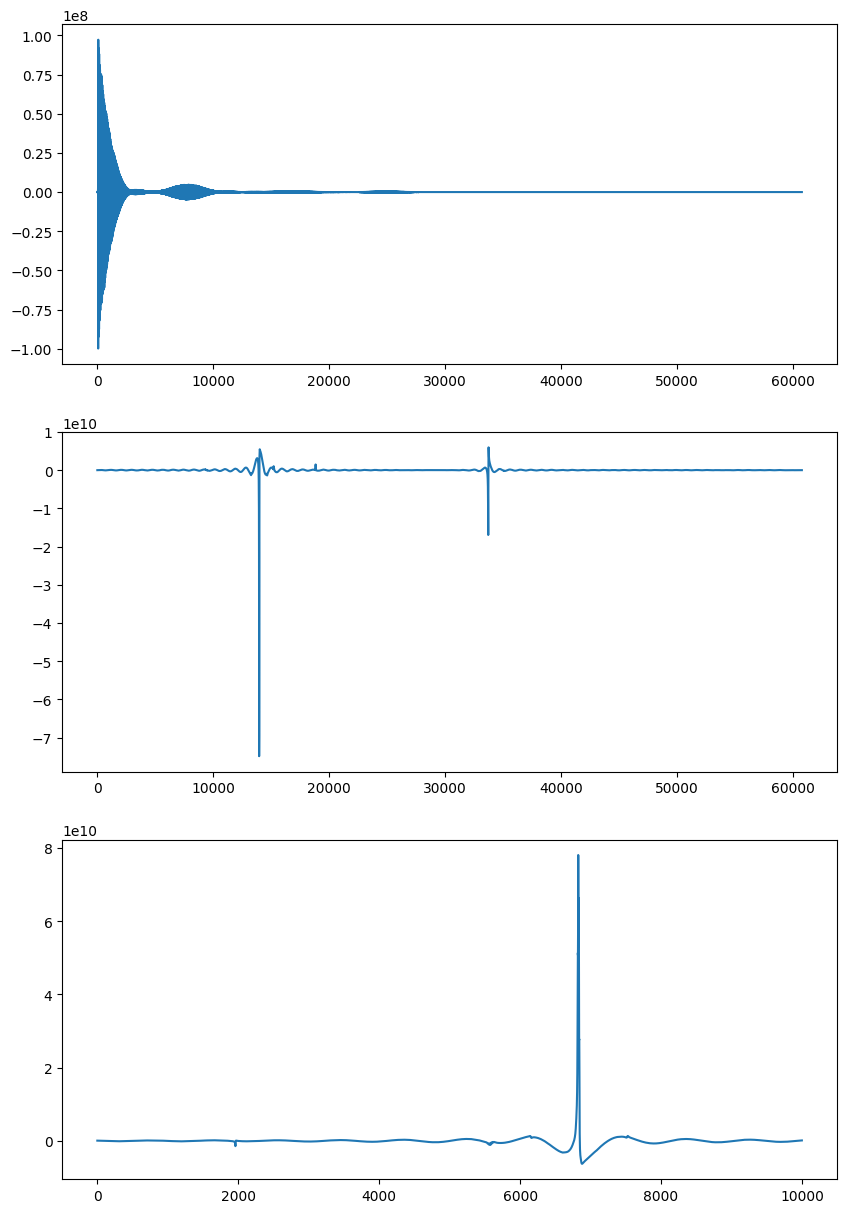

In [55]:
fig = plt.figure(figsize=(10,15))
td = fig.add_subplot(311)
ft = fig.add_subplot(312)
proc = fig.add_subplot(313)
naked_data = ng.bruker.remove_digital_filter(di, data)
p_data = ng.proc_base.zf(data, 32768)

td.plot(p_data)
fted = ng.proc_base.fft(p_data)
ft.plot(fted)
fted = ng.proc_base.ps(fted, p0=-150)
proced = ng.proc_base.rev(ng.proc_base.di(fted))
proc.plot(proced[40000:50000])

In [51]:
fout = open("proced_spect", "w")
for pt in proced:
    fout.write(str(pt))
    fout.write('\n')
fout.close

<function TextIOWrapper.close()>